In [40]:
import pandas as pd
import datetime
import requests
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import constants

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle
from unicodedata import normalize
import yfinance as yf
pd.set_option('display.max_colwidth', None)

ticker = 'CCL'
website = 'finviz'
outdir = 'parsed_data/'
date_from = '2020-01-01'
date_to = '2021-03-05'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/avalee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
data = {"symbol": ticker,
        "from": date_from,
        "to": date_to,
        "token": constants.FINNHUB_KEY} 
response = requests.get('https://finnhub.io/api/v1/company-news', data)

In [42]:
df = pd.DataFrame.from_dict(response.json()).drop(['category', 'id', 'image', 'url'], axis=1)
df['datetime'] = pd.to_datetime(df['datetime'],unit='s')
df = df.set_index('datetime')
df

,headline,related,source,summary
datetime,,,,
2021-03-04 16:58:00,"Carnival Corp. stock falls Thursday, underperforms market",CCL,MarketWatch,"Shares of Carnival Corp. slid 4.43% to $27.40 Thursday, on what proved to be an all-around dismal trading session for the stock market, with the S&P 500..."
2021-03-03 18:40:00,Princess Cruises extends cruise pause from U.K.,CCL,MarketWatch,Carnival Corp.'s Princess Cruises said it is extending the pause of its U.K.-based cruise voyages from Southampton through Sept. 25 as cruise operators...
2021-03-03 16:58:00,Carnival Corp. stock outperforms competitors on strong trading day,CCL,MarketWatch,"Shares of Carnival Corp. rose 3.91% to $28.67 Wednesday, on what proved to be an all-around grim trading session for the stock market, with the S&P 500 Index..."
2021-03-02 03:50:00,U.S. Stock Futures Tick Lower,CCL,DowJones,U.S. stock futures slipped and global indexes wavered a day after Wall Street logged its best day since June.
2021-03-02 16:58:00,"Carnival Corp. stock rises Tuesday, outperforms market",CCL,MarketWatch,"Shares of Carnival Corp. advanced 4.87% to $27.59 Tuesday, on what proved to be an all-around grim trading session for the stock market, with the S&P 500..."
...,...,...,...,...
2020-11-02 19:19:00,Cruise stocks fall to buck the broad market rally after Norwegian extends suspensions,CCL,Yahoo,"Shares of cruise operators were hit hard Monday, as they failed to ride the rising tide of the broader stock market after Norwegian Cruise Line Holdings Ltd. announced an extension of its cruise suspensions until next year."
2020-11-02 16:45:00,Cruise stocks dive to buck broad market rally after Norwegian extends suspensions,CCL,Yahoo,"Shares of cruise operators were hit hard Monday, as they failed to ride the rising tide of the broader stock market after Norwegian Cruise Line Holdings Ltd. announced an extension of its cruise suspensions until next year."
2020-11-02 16:40:00,"Why Norwegian Cruise, Carnival Corporation, and Royal Caribbean Stocks All Just Slumped",CCL,Yahoo,"Prior to that, on Friday, Oct. 30, the CDC announced a new ""framework for conditional sailing order"" to guide cruise lines as they prepare to resume carrying passengers to sea. Investors' immediate reaction to the news was positive, and cruise ship stocks jumped on Friday."


In [35]:
website = 'finnhub'
file = open(f'parsed_data/{ticker}_{data["from"]}_{data["to"]}_{website}.pkl', 'wb')
pickle.dump(df, file)
file.close()

In [44]:
website = 'finnhub'
ticker = 'UAL'
file = open(f'parsed_data/{ticker}_{data["from"]}_{data["to"]}_{website}.pkl', 'rb')
data = pickle.load(file)
file.close()
data

,headline,related,source,summary
datetime,,,,
2021-03-04 17:14:00,United Airlines Holdings Inc. stock underperforms Thursday when compared to competitors,UAL,MarketWatch,"Shares of United Airlines Holdings Inc. shed 4.62% to $52.05 Thursday, on what proved to be an all-around grim trading session for the stock market, with the..."
2021-03-04 20:16:00,"Mesa Air stock tumbles in wake of analyst downgrade, CEO share sales",UAL,marketwatch,"Shares of Mesa Air Group Inc. tumbled Thursday, after the regional air carrier disclosed stock sales by its chief executive, just before Deutsche Bank..."
2021-03-04 09:41:00,"More Pressure On Tech Sector To Start Day, With Apple, Microsoft Both Lower",UAL,Benzinga,"The “tug of war” between investors and the Fed continues, with the Tech sector taking the brunt of the blow. Major indices are in the red again this morning with the..."
2021-03-03 17:14:00,"United Airlines Holdings Inc. stock rises Wednesday, outperforms market",UAL,MarketWatch,"Shares of United Airlines Holdings Inc. rallied 2.56% to $54.57 Wednesday, on what proved to be an all-around grim trading session for the stock market, with..."
2021-03-02 17:14:00,"United Airlines Holdings Inc. stock falls Tuesday, still outperforms market",UAL,MarketWatch,"Shares of United Airlines Holdings Inc. slumped 0.19% to $53.21 Tuesday, on what proved to be an all-around dismal trading session for the stock market, with..."
...,...,...,...,...
2020-12-18 14:01:00,United Airlines Works With Health Officials Following Possible Covid-19 Death,UAL,DowJones,The carrier is working with health officials in order to contact passengers on a flight Monday that was diverted for a medical emergency.
2020-12-18 00:52:11,U.S. lawmakers consider aid for aerospace workers in COVID-19 bill,UAL,Nasdaq,"U.S. lawmakers are considering providing payroll assistance for aerospace manufacturers and suppliers as part of a massive $900 billion COVID-19 relief bill, congressional aides told Reuters."
2020-12-17 20:55:00,JetBlue Airways Corp. stock underperforms Thursday when compared to competitors,UAL,MarketWatch,"Shares of JetBlue Airways Corp. slid 2.53% to $14.28 Thursday, on what proved to be an all-around favorable trading session for the stock market, with the..."


In [4]:
# News sentiment
response = requests.get(f'https://finnhub.io/api/v1/news-sentiment?symbol={ticker}&token={constants.FINNHUB_KEY}')
response.json()
file = open('news_sentiment.pkl', 'wb')
pickle.dump(response.json()['buzz'], file)
file.close()

In [2]:
# Alpha Vantage
#data = yf.download("AAPL", start="2020-03-01", end="2020-03-05", interval='60m', progress=False)
symbol = 'TSLA'
data = { "function": "TIME_SERIES_INTRADAY",  # Returns most recent 1-2 months data
    "symbol": symbol,
    "interval": '5min',
    "outputsize" : "full", # compact is default (latest 100 data points)
    "apikey": constants.ALPHAVANTAGE_KEY } 
response = requests.get('https://www.alphavantage.co/query', data)



In [3]:
# #pd.DataFrame.from_dict(response.json())
price = pd.DataFrame.from_dict(response.json()['Time Series (5min)'], orient= 'index').sort_index(axis=1)
price = price.rename(columns={ '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'})
price.index = pd.to_datetime(price.index) # Convert index to datetime idx

price.loc['2021-02-24']

,Open,High,Low,Close,Volume
2021-02-24 20:00:00,738.1000,738.4000,738.0000,738.2000,13851
2021-02-24 19:55:00,738.1000,738.5000,738.0500,738.1000,4863
2021-02-24 19:50:00,738.5500,738.5500,738.5000,738.5000,1658
2021-02-24 19:45:00,738.4800,738.9400,738.4800,738.5000,2861
2021-02-24 19:40:00,738.5200,738.5200,738.3900,738.3900,1066
...,...,...,...,...,...
2021-02-24 04:25:00,716.5000,716.5000,716.0000,716.0000,2173
2021-02-24 04:20:00,717.9700,718.0000,716.7000,716.7000,3374
2021-02-24 04:15:00,714.7600,715.0000,713.9900,715.0000,6770
2021-02-24 04:10:00,713.4500,715.2200,712.0100,714.9800,16227


In [4]:
# pd.DataFrame(parsed_data, columns=['timestamp', 'title']).set_index('timestamp', drop=True)

In [7]:
file = open(f'parsed_data/{ticker}_2021-02-23_{website}.pkl', 'rb')
data = pickle.load(file)
file.close()
df = pd.DataFrame(data, columns=['timestamp', 'ticker', 'title', 'source']).set_index('timestamp', drop=True)



In [8]:
# https://www.kaggle.com/mmmarchetti/sentiment-analysis-on-financial-news
# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

# Apply vader on headlines
scores = df['title'].apply(vader.polarity_scores)
scored_df = df.join(pd.DataFrame.from_records(scores)) # convert scores to df and combine the dfs




<Figure size 720x576 with 0 Axes>

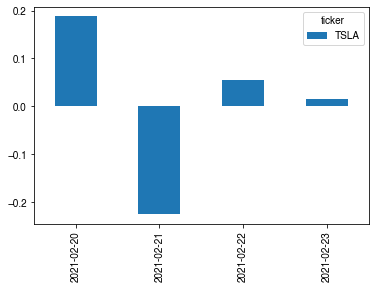

In [9]:
plt.figure(figsize=(10,8))
mean_df = scored_df.groupby(['ticker', scored_df.index.date]).mean().unstack()
mean_df = mean_df.xs('compound', axis=1).transpose()
mean_df.plot(kind='bar')
plt.show()

In [ ]:
#price.iloc[scored_df.index.round('5min')] # Locate rows with date

In [ ]:
# See which words the lexicon is classifying as positive, negative or neutral